# 导数

## 切线（Tangent line）

中学介绍导数的时候，通常会举两个例子，其一是几何意上的例子：对函数关于某一点进行求导，得到的是函数该点处切线的斜率。

选中函数图像中某一点，然后不断地将函数图放大，当我们将镜头拉至足够近后便会发现函数图看上去像一条直线，这条直线就是切线。

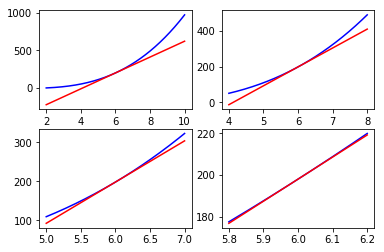

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x

# 函数
f = x**3 - 2*x - 6
# 在 x=6 处正切于函数的切线
line = 106*x - 438

d1 = np.linspace(2, 10, 1000)
d2 = np.linspace(4, 8, 1000)
d3 = np.linspace(5, 7, 1000)
d4 = np.linspace(5.8, 6.2, 1000)
domains = [d1, d2, d3, d4]

# 画图函数
def makeplot(f, l, d):
    plt.plot(d, [f.evalf(subs={x: xval}) for xval in d], 'b', \
             d, [l.evalf(subs={x: xval}) for xval in d], 'r')

for i in range(len(domains)):
    # 绘制包含多个子图的图表
    plt.subplot(2, 2, i+1)
    makeplot(f, line, domains[i])

plt.show()

另一个是物理中的例子：对路程的时间函数 $s(t)$ 求导可以得到速度的时间函数 $v(t)$，再进一步求导可以得到加速度的时间函数 $a(t)$ 这个理解较好，因为导数真正关心的事是：当我们稍微改变一点函数的输入值时，函数的输出值会有怎样变化。在单元时，导数看上去是曲线的切线斜率，但是到更多元时，就很难有“斜率”这样的直观感受了，但是输出值随着输入值的极小变化而产生的相应变化这样的理解还是成立的。

## 导数（Derivative）

导数的定义如下：

**定义1：**

$$f'(a) = \frac{df}{dx}|_{x=a} = \lim_{x\rightarrow a} \frac{f(x)-f(a)}{x-a}$$

若该极限不存在，则函数在 $x=a$ 处的导数不存在。

**定义2：**

$$f'(a) = \frac{df}{dx}|_{x=a} = \lim_{h\rightarrow 0} \frac{f(a+h)-f(a)}{h}$$

若该极限不存在，则函数在 $x=a$ 处的导数不存在。

**定义3：**

函数 $f(x)$ 在 $x=a$ 处的导数 $f'(a)$ 是满足如下条件的常数 $C$：

对于在 $a$ 附近输入值的微小变化 $h$ 有：$f(a+h) = f(a) + Ch + O(h^2)$ 始终成立。也就是说导数 $C$ 是输出值变化中一阶项的系数。

如果难以理解的话，对上式稍加变化，两边同时除以 $h$ 并同时取极限可以得到：

$\lim_{h\rightarrow0} \frac{f(a+h)-f(a)}{h} = \lim_{h\rightarrow0}C + O(h) = C$

便于上面**定义2**相一致了。

举一例，求 $cos(x)$ 在 $x=a$ 处的导数：

$\cos(a+h) = \cos(a)\cos(h) - \sin(a)\sin(h)$

$\qquad=\cos(a)(1+O(h^2)) - \sin(a)(h+O(h^2))$

$\qquad=\cos(a) - \sin(a)h + O(h^2)$

*PS: cos(x) 和 sin(x) 的大O记法，请参考上一节内容*

因此，$\frac{d}{dx} \cos(x)|_{x=a} = -\sin(a)$

各位读者可以自行回顾一下求导的规则和技巧，本书中便不进行展开了。

我们可以如下定义自己的求导数的函数：

In [6]:
f = lambda x: x**3 -2*x - 6
# 我们设定参数h的默认值，如果调用函数时没有指明参数h的值，便会使用默认值
def derivative(f, h=0.000001):
    return lambda x: float(f(x+h) - f(x)) / h

fprime = derivative(f)

print(fprime(6))

106.00001800753489


Sympy 也提供了求导的方法：

In [7]:
from sympy.abc import x
f = x**3 -2*x - 6
print(f.diff())
# 导函数为：3*x**2 - 2
print(f.diff().evalf(subs={x:6}))
# 106.000000000000

3*x**2 - 2
106.000000000000


## 线性近似（Linear approximation）

依据导数的定义3，我们有：

$f(a+h) = f(a) + f'(a)h + O(h^2)$

如果将高阶项丢掉，就获得了 $f(a+h)$ 的线性近似式子：

$f(a+h) \approx f(a) + f'(a)h$

举个例子，用线性近似的方法估算 $\sqrt{255}$：

$\sqrt{256-1} \approx \sqrt{256} + \frac{1}{2\sqrt{256}}(-1)$

$\qquad=16 - \frac{1}{32}$

$\qquad=15\frac{31}{32}$